<a href="https://colab.research.google.com/github/hyulianton/jejaringsosial/blob/master/js_visualisasi_jaringan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## 🚀 Cell 1: Persiapan dan Instalasi Pustaka
# Instalasi pustaka yang diperlukan.
# networkx untuk manipulasi jaringan dan matplotlib untuk visualisasi dasar.

!pip install networkx matplotlib -q

import networkx as nx
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
import io

print("Pustaka berhasil diinstal dan diimpor.")

Pustaka berhasil diinstal dan diimpor.


In [3]:
## 💾 Cell 2 (Revisi Final-2): Mengunduh dan Memuat Dataset GraphML
# Menggunakan link GraphML yang disediakan oleh Heri. Format GraphML
# lebih kaya data dan lebih mudah dimuat oleh networkx dibandingkan CSV.

import requests
import io
import networkx as nx

# URL ke file dataset Marvel dalam format GraphML
marvel_url_graphml = "https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/refs/heads/master/sample-datasets/marvel/marvel-network.graphml"
file_name_graphml = "marvel-network.graphml"

print(f"Mencoba mengunduh dataset GraphML dari: {marvel_url_graphml}...")

try:
    # Menggunakan requests untuk mengunduh data
    response = requests.get(marvel_url_graphml, stream=True)
    response.raise_for_status() # Akan memunculkan error jika 4xx/5xx

    # Simpan konten ke file lokal
    with open(file_name_graphml, 'wb') as f:
        f.write(response.content)

    # Memuat file GraphML yang diunduh ke dalam objek Graph networkx
    # networkx.read_graphml() digunakan untuk format ini.
    G = nx.read_graphml(file_name_graphml)

    # Membersihkan graf (menghapus self-loop)
    G.remove_edges_from(nx.selfloop_edges(G))

    print("Pengunduhan dan pemuatan berhasil menggunakan sumber GraphML.")
    print(f"Jumlah Node (Karakter): {G.number_of_nodes()}")
    print(f"Jumlah Edge (Interaksi): {G.number_of_edges()}")

except requests.exceptions.HTTPError as errh:
    print(f"HTTP Error terjadi: {errh}")
    print("Gagal mengunduh. URL mungkin telah berubah lagi.")
    G = nx.Graph()
except Exception as e:
    print(f"Terjadi kesalahan saat memproses data: {e}")
    G = nx.Graph()

Mencoba mengunduh dataset GraphML dari: https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/refs/heads/master/sample-datasets/marvel/marvel-network.graphml...
Pengunduhan dan pemuatan berhasil menggunakan sumber GraphML.
Jumlah Node (Karakter): 327
Jumlah Edge (Interaksi): 9891


In [4]:
## 📊 Cell 3 (Revisi): Fungsi Visualisasi, Filtering, dan Sampling
# Revisi fungsi visualisasi untuk menerapkan Filtering dan Sampling.
# Kita akan memvisualisasikan Komponen Terbesar (LCC) setelah filtering.

def visualize_network(G, pos, title, node_color='skyblue', edge_alpha=0.1, node_size=10, show_labels=False):
    """
    Memvisualisasikan graf G menggunakan posisi (pos) yang sudah dihitung.
    """
    if G.number_of_nodes() == 0:
        print(f"Gagal memvisualisasikan: Graf '{title}' kosong.")
        return

    plt.figure(figsize=(12, 12))

    # Penggambaran Node
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=node_size,
        node_color=node_color,
        alpha=0.8
    )

    # Penggambaran Edge
    nx.draw_networkx_edges(
        G,
        pos,
        edge_color='gray',
        alpha=edge_alpha,
        width=0.5
    )

    # Tambahkan Label hanya jika diminta
    if show_labels and G.number_of_nodes() < 50:
        nx.draw_networkx_labels(G, pos, font_size=8)

    plt.title(f"Visualisasi Jaringan Marvel: {title}", fontsize=18)
    plt.axis('off')
    plt.show()

# --- Teknik Filtering dan Sampling ---

# 1. Filtering Berdasarkan Degree (Sentralitas): Hapus node dengan derajat rendah.
# Node yang hanya terhubung ke 1 atau 2 edge (low-degree nodes) seringkali
# tidak informatif dan hanya menambah clutter.
min_degree = 70 # Kita pertahankan hanya karakter yang terhubung ke minimal 5 karakter lain.

# Buat salinan graf untuk filtering
G_filtered = G.copy()
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree < min_degree]
G_filtered.remove_nodes_from(nodes_to_remove)

# 2. Ambil Komponen Terbesar (LCC) dari hasil filtering (Sampling)
# Ini adalah bentuk sampling topologi.
if G_filtered.number_of_nodes() > 0:
    components = nx.connected_components(G_filtered)
    largest_component = max(components, key=len)
    G_lcc_filtered = G_filtered.subgraph(largest_component).copy()
    print(f"Graf Awal: {G.number_of_nodes()} node.")
    print(f"Setelah Filtering (derajat < {min_degree}): {G_filtered.number_of_nodes()} node.")
    print(f"Memvisualisasikan Komponen Terbesar yang Difilter (LCC): {G_lcc_filtered.number_of_nodes()} node.")
else:
    G_lcc_filtered = nx.Graph()
    print("Graf kosong setelah filtering.")

Graf Awal: 327 node.
Setelah Filtering (derajat < 70): 88 node.
Memvisualisasikan Komponen Terbesar yang Difilter (LCC): 88 node.


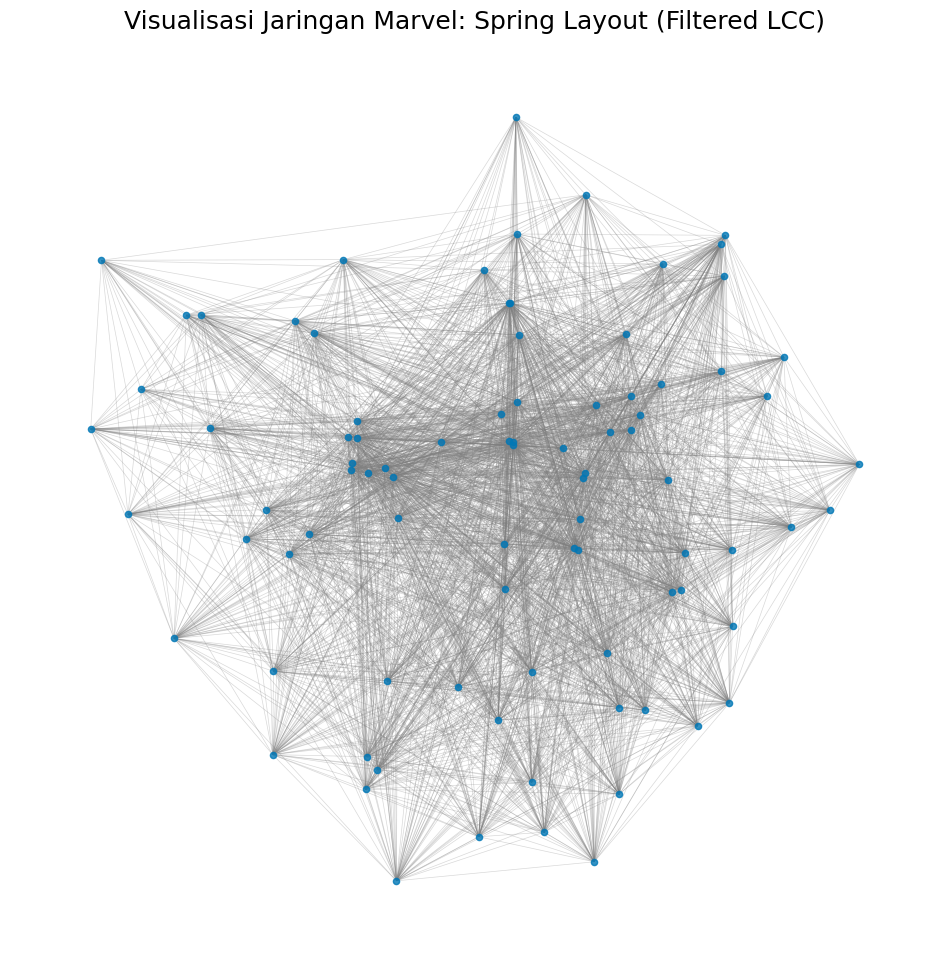

In [5]:
## 🖼️ Cell 4 (Revisi): Visualisasi dengan Filtering dan Penerapan Layout yang Mengurangi Clutter

# Hitung posisi menggunakan Spring Layout pada graf yang sudah di-filter.
# Hasilnya lebih fokus pada klaster sentral.
if G_lcc_filtered.number_of_nodes() > 0:
    # Menggunakan k (jarak optimal) yang lebih kecil dan iterasi lebih banyak
    # untuk klaster yang lebih padat dan mengurangi edge crossing.
    pos_spring_filtered = nx.spring_layout(G_lcc_filtered, k=0.08, iterations=100)

    visualize_network(
        G_lcc_filtered,
        pos_spring_filtered,
        title="Spring Layout (Filtered LCC)",
        node_color='#0077B6', # Biru
        edge_alpha=0.3, # Edge lebih tebal (karena jumlahnya sedikit)
        node_size=20
    )

Mendeteksi Komunitas (Clustering) menggunakan Louvain Method...
Modularity yang Dihasilkan: 0.3089


/tmp/ipython-input-1836902363.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Spectral', num_communities)


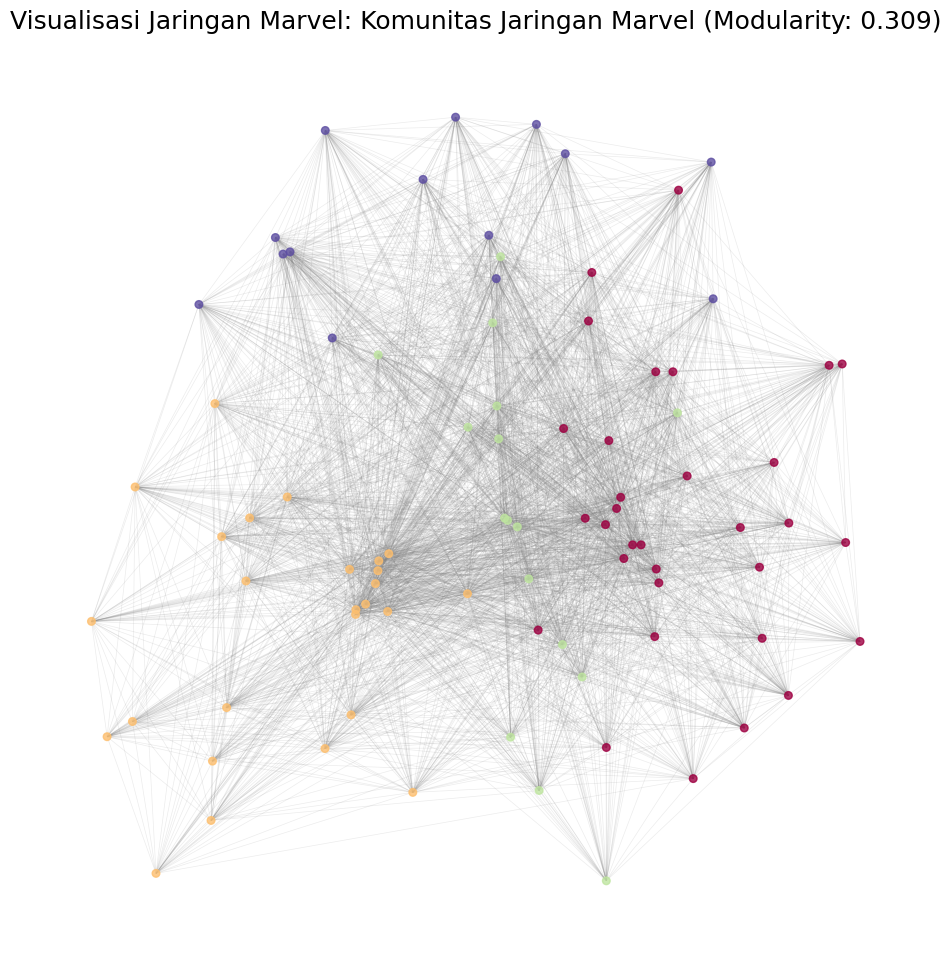

In [6]:
## 🛠️ Cell 5 (Revisi Final Fix Namespace): Deteksi Komunitas (Agregasi) dan Visualisasi

# Kita asumsikan pustaka 'python-louvain' sudah terinstal.
# Jika masih gagal, kita akan melakukan instalasi ulang dan memuatnya secara eksplisit.
try:
    # Uji coba impor dan fungsi utama
    import community as community_louvain
    _ = community_louvain.best_partition # Tes keberadaan fungsi

except AttributeError:
    # Jika AttributeError muncul (meskipun impor berhasil), lakukan instalasi ulang paksa.
    print("Menginstal ulang pustaka 'python-louvain' untuk mengatasi konflik namespace...")
    !pip install --force-reinstall python-louvain
    import community as community_louvain
    print("Pustaka community berhasil dimuat ulang.")
except ImportError:
    # Jika belum terinstal
    !pip install python-louvain
    import community as community_louvain


# Pastikan G_lcc_filtered telah terdefinisi dan memiliki node
if 'G_lcc_filtered' in locals() and G_lcc_filtered.number_of_nodes() > 0:
    print("Mendeteksi Komunitas (Clustering) menggunakan Louvain Method...")

    # 1. Hitung partisi Louvain
    # Panggil fungsi melalui alias yang telah dikonfirmasi bekerja setelah instalasi ulang paksa.
    partition = community_louvain.best_partition(G_lcc_filtered)

    # 2. Hitung modularity (ukuran kualitas clustering)
    modularity = community_louvain.modularity(partition, G_lcc_filtered)
    print(f"Modularity yang Dihasilkan: {modularity:.4f}")

    # Siapkan warna berdasarkan ID komunitas
    num_communities = max(partition.values()) + 1
    cmap = plt.cm.get_cmap('Spectral', num_communities)
    node_colors = [cmap(partition[node]) for node in G_lcc_filtered.nodes()]

    # Hitung ulang layout pada graf yang sama
    pos_comm = nx.spring_layout(G_lcc_filtered, k=0.08, iterations=100)

    # Visualisasi dengan Komunitas
    visualize_network(
        G_lcc_filtered,
        pos_comm,
        title=f"Komunitas Jaringan Marvel (Modularity: {modularity:.3f})",
        node_color=node_colors, # Warna berdasarkan komunitas
        edge_alpha=0.15,
        node_size=30
    )
else:
    print("Tidak dapat menjalankan deteksi komunitas karena graf G_lcc_filtered kosong atau tidak terdefinisi.")